# Introduction GeoPandas for Python 103


GeoPandas เป็นไลบรารีใน Python ที่ออกแบบมาเพื่อทำงานกับข้อมูลเชิงพื้นที่ (geospatial data) ได้อย่างสะดวกและมีประสิทธิภาพ โดยมีความสามารถในการจัดการข้อมูลทางภูมิศาสตร์ในรูปแบบของ GeoDataFrame ซึ่งเป็นโครงสร้างข้อมูลที่คล้ายกับ DataFrame ของ Pandas แต่เพิ่มความสามารถในการจัดการข้อมูลเชิงพื้นที่เข้าไป เช่น ข้อมูลพิกัด จุด, เส้น, และพื้นที่ เป็นต้น

pip install geopandas

In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd

__________________________________________________________________________________________________________________________________________________________________________________

#### 1. Go To Geomentry

การเก็บข้อมูลแบบ geometry ในฐานข้อมูลหรือไฟล์ข้อมูลเชิงพื้นที่ (GIS) เกี่ยวข้องกับการจัดเก็บข้อมูลที่เกี่ยวกับรูปทรงทางภูมิศาสตร์ เช่น จุด เส้น และหลายเหลี่ยม รูปแบบการเก็บข้อมูลสามารถแตกต่างกันตามเทคโนโลยีและความต้องการของผู้ใช้  หัวใจสำคัญของการวิเคราะห์เชิงพื้นที่ คือการแปลงข้อมูลจากแหล่งข้อมูลต่าง ๆ ให้อยู่ในรูปแบบของ geometry สำหรับการใช้งาน Geopandas จากบทเรียนครั้งก่อน มีการอธิบายโครงสร้าง GIS file ซึ่งมีจะสามารถแปลงข้อมูล ได้ด้วยวิธีนี้ 
- Well-Known Text (WKT) 
- Well-Known Binary (WKB)  
- GeoJSON
- KML (Keyhole Markup Language) 
- ESRI 

##### 1.1 การแปลง Well-Known Text (WKT) 

- ใช้ฟังก์ชัน wkt.loads จากไลบรารี shapely เพื่อแปลงข้อมูล WKT เป็นรูปแบบ geometry
- คอลัมน์ใหม่ geometry จะเก็บข้อมูลในรูปแบบ geometry ที่แปลงจาก WKT
- ใช้ geopandas.GeoDataFrame เพื่อสร้าง GeoDataFrame จาก DataFrame เดิม

In [150]:
# Example Dataframe WKT
df11 = pd.DataFrame({
    'ID': [1, 2, 3],
    'WKT': [
        'POINT (30 10)',
        'LINESTRING (30 10, 10 30, 40 40)',
        'POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))'
    ]
})

In [151]:
from shapely import wkt

# แปลงคอลัมน์ WKT เป็น Geometry โดยใช้ Shapely

df11['geometry'] = df11['WKT'].apply(wkt.loads)

# Create a GeoDataFrame
gdf11 = gpd.GeoDataFrame(df11, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf11.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84

,ID,WKT,geometry
0,1,POINT (30 10),POINT (30.00000 10.00000)
1,2,"LINESTRING (30 10, 10 30, 40 40)","LINESTRING (30.00000 10.00000, 10.00000 30.000..."
2,3,"POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))","POLYGON ((30.00000 10.00000, 40.00000 40.00000..."


##### 1.2 Well-Known Binary (WKB)  

- กรณีข้อมูลเป็น string หรือ text ให้ใช้ libery binascii คำสั่ง binascii.unhexlify เพื่อแปลงให้เป็น ตัวเลขฐานสิบหก
- ใช้ฟังก์ชัน wkb.loads จากไลบรารี shapely เพื่อแปลงข้อมูล WKB เป็นรูปแบบ geometry
- สามารถใช้ฟังก์ชัน def wkb_to_geometry(wkb_hex): ในการแปลง text เป็น binary เป็น geometry 
- ใช้ geopandas.GeoDataFrame เพื่อสร้าง GeoDataFrame จาก DataFrame เดิม


In [57]:
# Example Dataframe WKB
df12 = pd.DataFrame({
    'ID': [1, 2, 3],
    'WKB': [
        '0101000020E61000002C452958BA285940E7A19D7002612C40', 
        '0101000020E61000004442844DB7285940C1EB575E16612C40', 
        '0101000020E61000008BC40F8FB428594048B60F8425612C40'  
    ]
})


In [58]:
import binascii
from shapely import wkb

# Function to convert WKB to shapely geometry แปลงคอลัมน์ WKB เป็น จาก text เป็น binary ฐานสิบหก โดยใช้ libery binascii
def wkb_to_geometry(wkb_hex):
    # แปลงจาก hex เป็น binary
    wkb_bin = binascii.unhexlify(wkb_hex)
    return wkb.loads(wkb_bin)

# แปลงคอลัมน์ 'WKB' จาก WKB เป็น Geometry
df12['geometry'] = df12['WKB'].apply(wkb_to_geometry)

# Create a GeoDataFrame
gdf12 = gpd.GeoDataFrame(df12, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf12.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84

,ID,WKB,geometry
0,1,0101000020E61000002C452958BA285940E7A19D700261...,POINT (100.63637 14.18947)
1,2,0101000020E61000004442844DB7285940C1EB575E1661...,POINT (100.63619 14.18962)
2,3,0101000020E61000008BC40F8FB428594048B60F842561...,POINT (100.63602 14.18974)


##### 1.3 GeoJSON

- กรณีข้อมูลที่ส่งมาเป็นรูปแบบ GeoJSON โครงสร้างเหล่านี้จะมี องค์ประกอบ "features" ที่กำหนด Coodinate ไว้
- หากโครงสร้างถูกต้องสามาใช้ GeoDataFrame.from_features() ในการแปลงเป็น geoDataframe ได้เลย
- หากโครงสร้างไม่ถูกต้อง เช่น เป็น JSON ที่เก็บ (WKT,WKB) หรือ Lat Lon ต้องแปลงเหล่านั้นก่อน โดย Extract ด้วย pd.Series หรือ pd.json_normalize

In [153]:
# กรณีไฟล์มาในรูปแบบ GeoJSON และมี features ที่โครงสร้างถูกต้อง

import requests

# Example  GeoJSON

geojson_url = 'https://gist.githubusercontent.com/sssatiii/561d2a47ba90712279ea86d3b4706a16/raw/7aa044d3ce96b94270f366c12c72bbc32eb307bb/sample1.geojson'
response = requests.get(geojson_url)
if response.status_code == 200:
    # Parse the JSON content
    data13_1 = response.json()
else:
    print("Failed to fetch the JSON data.")

# Create a GeoDataFrame
gdf13_1 = gpd.GeoDataFrame.from_features(data13_1['features'])

# Set the CRS (Coordinate Reference System)
gdf13_1.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84


,geometry,id,name,description
0,POINT (-74.00600 40.71280),1,New York City,The largest city in the United States.
1,"LINESTRING (-74.00600 40.71280, -73.93520 40.7...",2,Path from NYC to nearby location,A line connecting two points.
2,"POLYGON ((-74.00600 40.71280, -73.93520 40.730...",3,Sample Area,A polygon defining an area.
3,"MULTIPOINT (-74.00600 40.71280, -73.93520 40.7...",4,Multiple Points,A collection of points.
4,"MULTILINESTRING ((-74.00600 40.71280, -73.9352...",5,Multiple Lines,A collection of lines.
5,"MULTIPOLYGON (((-74.00600 40.71280, -73.93520 ...",6,Multiple Polygons,A collection of polygons.


In [222]:
# กรณีไฟล์มาในรูปแบบ JSON และต้องแปลงเอง

import requests

# Example  JSON

json_url = 'https://gist.githubusercontent.com/sssatiii/561d2a47ba90712279ea86d3b4706a16/raw/7aa044d3ce96b94270f366c12c72bbc32eb307bb/sample2.json'
response = requests.get(json_url)
if response.status_code == 200:
    # Parse the JSON content
    data13_2 = response.json()
else:
    print("Failed to fetch the JSON data.")

df13_2 = pd.DataFrame(data13_2)

# ทำการ Extract แยก คอลัมน์
df13_2 = pd.json_normalize(df13_2['features'])
df13_2['geometry'] = df13_2.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Create a GeoDataFrame
gdf13_2 = gpd.GeoDataFrame(df13_2, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf13_2.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84



,id,lat,lon,geometry.type,geometry.coordinates,properties.wkb,properties.feature,geometry
0,1,40.7128,-74.0060,Point,"[-74.006, 40.7128]",01010000005839B4C876BEF33F83C0CAA146B40,Building,POINT (-74.00600 40.71280)
1,2,34.0522,-118.2437,Point,"[-118.2437, 34.0522]",0101000000CDCCCCCCCC8C3F403F33333333,Park,POINT (-118.24370 34.05220)
2,3,37.7749,-122.4194,Point,"[-122.4194, 37.7749]",0101000000F03F8F5C3F3F403F807F8000000000,Monument,POINT (-122.41940 37.77490)


##### 1.4 KML (Keyhole Markup Language) 

- สำหรับรูปแบบไฟล์ KML มีรูปแบบการบันทึกที่หลากหลาย โดยทั่วไปจะประกอบไปด้วย Tag Placemark ในการจัดเก็บ Coordinate 
- โครงสร้าง tag พื้นฐาน ที่จะมีทุกไฟล์ประกอบด้วย name geometry types และ coordinates ซึ่งเหล่านี้เป็นตัวแปรสำคัญในการ แปลงเป็น geoDataframe
- กรณีโครงสร้าง tag ใน KML นั้นมีการผูก href link จะไม่สามารถทำการดึงได้
- เกร็ดน่ารู้ : ไฟล์ KML vs KMZ ต่างกันตรงที่ไฟล์ KMZ เป็นการบีบอัดไฟล์ KML ในหลายๆ Element คล้ายกับการทำ .zip , .rar เป็นต้น
- การใช้ Libery xml.etree.ElementTree คำสั่ง ET.fromstring() ให้อยู่ในรูปแบบ XML สำหรับไปประมวลผลต่อ
- namespace เป็นการระบุ ข้อมูลจากโครงสร้าง XML เพื่อแยกส่วนประกอบ
- Placemark เป็น tag ที่เก็บรายละเอียดข้อมูล เพื่อแปลงเป็น geoDataframe
- การทำ for loop และ append เข้า list ว่าง ประกอบด้วย  names = [] geometry_types = [] coordinates = []
- เงื่อนไข ใน for loop คลอบคลุม กรณี geometry types ใน KML ต่างกัน และ coordinates ต่างกัน โดยจะสามารถ Extract ออกมาเป็น Geometry ได้

In [360]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
from shapely.geometry import Point, LineString, Polygon


# URL ของไฟล์ KML
kml_url = 'https://gist.githubusercontent.com/sssatiii/561d2a47ba90712279ea86d3b4706a16/raw/b7230203bbcf8077a453a6e068e62f891ee0ee51/sample3.kml'
#kml_url = 'https://gist.githubusercontent.com/sssatiii/561d2a47ba90712279ea86d3b4706a16/raw/b7230203bbcf8077a453a6e068e62f891ee0ee51/sample4.kml'

response = requests.get(kml_url)

if response.status_code == 200:
    # Parse the KML content
    data14_1 = response.text # print(data14_1) เพื่ออ่านไฟล์
    root = ET.fromstring(data14_1) # ET.fromstring เพื่อดู namespace
    namespaces = {'kml': 'http://www.opengis.net/kml/2.2'} # Namespaces used in the KML file
    placemarks  = root.findall('.//kml:Placemark', namespaces) # ใช้คำสั่ง root.findal เพื่อดึง Placemark จาก kml
    
    # สร้าง list ว่างมารองรับข้อมูล ที่จะทำการ for loop
    names = []
    geometry = []

    # ทำการ for loop เพื่อ Extract ข้อมูลใน placemarks ของ โครงสร้าง kml
    for placemark in placemarks:
        name = placemark.find('kml:name',namespaces).text  if placemark.find('kml:name', namespaces) is not None else ''
        
        # ต่อไปนี้คือการ Extract Coodinate ใน placemaks
        if placemark.find('.//kml:Point', namespaces) is not None:
            geometry_type = 'Point'
            coord_elem = placemark.find('.//kml:coordinates', namespaces)
            coords = coord_elem.text.strip().split(',') if coord_elem is not None else ['', '']
            # Extract the (x, y) to Point coordinates of (x, y) 
            # Check how many coordinates are provided
            if len(coords) == 2:
                x, y = float(coords[0]), float(coords[1])
                geom = Point(x, y)
            elif len(coords) == 3:
                x, y, z = float(coords[0]), float(coords[1]), float(coords[2])
                geom = Point(x, y) if z == 0 else Point(x, y, z)
            else:
                geom = None
            
            
        
        elif placemark.find('.//kml:LineString', namespaces) is not None:
            geometry_type = 'LineString'
            coord_elem = placemark.find('.//kml:coordinates', namespaces)
            coords = coord_elem.text.strip().split() if coord_elem is not None else []
            # Extract the (x, y) to Line coordinates tuples of (x, y),(x,y) 
            line_coords = []
            for coord in coords:
                coord_split = coord.split(',')
                if len(coord_split) == 2:
                    x, y = float(coord_split[0]), float(coord_split[1])
                    line_coords.append((x, y))
                elif len(coord_split) == 3:
                    x, y, z = map(float, coord_split)
                    line_coords.append((x, y) if z == 0 else (x, y, z))
            geom = LineString(line_coords)
            
            
        
        elif placemark.find('.//kml:Polygon', namespaces) is not None:
            geometry_type = 'Polygon'
            coord_elem = placemark.find('.//kml:coordinates', namespaces)
            coords = coord_elem.text.strip().split() if coord_elem is not None else []
            # Extract the (x, y) to Polygon coordinates tuples of (x, y),(x,y),(x,y),(x,y) 
            polygon_coords = []
            for coord in coords:
                coord_split = coord.split(',')
                if len(coord_split) == 2:
                    x, y = float(coord_split[0]), float(coord_split[1])
                    polygon_coords.append((x, y))
                elif len(coord_split) == 3:
                    x, y, z = map(float, coord_split)
                    polygon_coords.append((x, y) if z == 0 else (x, y, z))
            geom = Polygon(polygon_coords)
        
        else:
            geometry_type = 'Unknown'
            geom = [' ']

        # นำ name , geomentry_types ,  ไปใส่ใน list ว่าง
        names.append(name)
        geometry.append(geom)
    
        
    
    # เมื่อมี list ที่ถูก append เราสามารถ สร้าง dataframe ได้เลย
    df14_1 = pd.DataFrame({
        'Name': names,
        'geometry': geometry
    })

else:
    print("Failed to fetch the KML data.")

# Create a GeoDataFrame
gdf14_1 = gpd.GeoDataFrame(df14_1, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf14_1.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84



,Name,geometry
0,Example Point,POINT (-122.08220 37.42229)
1,Example Line,"LINESTRING (-122.08220 37.42229, -122.08565 37..."
2,Example Polygon,"POLYGON ((-122.08407 37.42200, -122.08565 37.4..."


##### 1.5 ESRI

- arcgis/rest/services เป็นบริการที่ให้ข้อมูลทางภูมิศาสตร์และฟังก์ชันการทำงานผ่าน REST API ของ ArcGIS โครงสร้าง URL คือ https://<server>/arcgis/rest/services/<service_name>/<service_type>/MapServer
- ให้บริการ MapService , FeatureService , ImageService , Layer
- มี parameter หลัก ๆ 3 ส่วน คือ 
    - where: ใช้ในการระบุเงื่อนไขในการดึงข้อมูล เช่น where=1=1 เพื่อดึงข้อมูลทั้งหมด
    - outFields: ใช้ในการกำหนดฟิลด์ที่ต้องการดึงจากข้อมูล เช่น outFields=* เพื่อดึงทุกฟิลด์
    - f: ระบุรูปแบบที่ต้องการสำหรับผลลัพธ์ เช่น f=json เพื่อดึงข้อมูลในรูปแบบ JSON
- โครงสร้างข้อมูล หลัก ๆ มี 
    - Geometry: ข้อมูลที่แสดงรูปร่างทางภูมิศาสตร์ เช่น จุด, เส้น, หรือโพลิกอน
    - Attributes: ข้อมูลเชิงลักษณะของฟีเจอร์ เช่น ชื่อ, ประเภท, หรือรหัส
- เมื่อทำการ request ข้อมูล สามารถใช้ฟังก์ชัน convert_to_geodataframe ในการแปลง ให้อยู่ในรูปแบบ geoDataframe

In [145]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon

#11.4_2 ESRI

################# ขั้นตอนที่ 1 Load ข้อมูลมาใส่ Dataframe

# URL ของ GIS File อยู่ในรูปแบบ ESRI mapService

# service แบบ geometry(x,y) --> point ตำแหน่งปลอดภัยจากแผ่นดินถล่ม :: https://data.dmr.go.th/en_AU/dataset/safe_landslide_area?activity_id=0f5a2afc-a024-4243-b5a9-72570f363ba8
#url15 = "https://gisportal.dmr.go.th/arcgis/rest/services/HAZARD/%E0%B8%95%E0%B8%B3%E0%B9%81%E0%B8%AB%E0%B8%99%E0%B9%88%E0%B8%87%E0%B8%9B%E0%B8%A5%E0%B8%AD%E0%B8%94%E0%B8%A0%E0%B8%B1%E0%B8%A2%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B9%81%E0%B8%9C%E0%B9%88%E0%B8%99%E0%B8%94%E0%B8%B4%E0%B8%99%E0%B8%96%E0%B8%A5%E0%B9%88%E0%B8%A1/MapServer/0/query"

# service แบบ paths --> linestring ชั้นข้อมูลแผนที่เส้นทางด่วน :: https://datagov.mot.go.th/dataset/transportgis
#url15 = "https://giportal.mot.go.th/arcgis/rest/services/Hosted/%E0%B9%80%E0%B8%AA%E0%B9%89%E0%B8%99%E0%B8%97%E0%B8%B2%E0%B8%87%E0%B8%94%E0%B9%88%E0%B8%A7%E0%B8%99_%E0%B8%81%E0%B8%97%E0%B8%9E/FeatureServer/0/query"

# service แบบ ring --> polygon พื้นที่มีโอกาสเกิดแผ่นดินถล่ม :: https://data.dmr.go.th/eu/dataset/landslide_susceptibility
url15 = "https://gisportal.dmr.go.th/arcgis/rest/services/HAZARD/LANDSLIDE_SUSCEPTIBILITY/MapServer/0/query"


# กำหนดพารามิเตอร์สำหรับการ query
params = {
    'where': '1=1',  # ดึงข้อมูลทั้งหมด
    'outFields': '*',  # ดึงทุกฟิลด์
    'f': 'json',  # ระบุว่าเราต้องการข้อมูลเป็น JSON
    'resultRecordCount': 2000,  # จำนวนแถวที่ต้องการดึงแต่ละครั้ง
    'resultOffset': 0,  # ชุดข้อมูลเริ่มต้น
}

# ฟังก์ชันดึงข้อมูลทั้งหมดจาก ArcGIS REST API
def fetch_all_data(url, params):
    data = []
    offset = 0
    while True:
        params['resultOffset'] = offset  # ปรับ resultOffset สำหรับแต่ละการดึงข้อมูล
        
        # ส่ง request ไปยัง API
        response = requests.get(url, params=params)
        response_json = response.json()
        
        # ตรวจสอบว่ามีฟีเจอร์ในผลลัพธ์หรือไม่
        if 'features' in response_json and response_json['features']:
            data.extend(response_json['features'])  # เพิ่มข้อมูลใหม่ที่ดึงมา
            offset += params['resultRecordCount']  # เพิ่ม offset เพื่อดึงข้อมูลชุดถัดไป
        else:
            break  # ถ้าไม่มีฟีเจอร์ในผลลัพธ์ ให้หยุดการดึงข้อมูล
    return data

# ดึงข้อมูลจากบริการ ArcGIS REST API
data15 = fetch_all_data(url15, params.copy())



################# ขั้นตอนที่ 2 แปลงเป็น Geodataframe

# ฟังก์ชันแปลงเป็น GeoDataFrame
def convert_to_geodataframe(geometry_type, features):
    geometries = []
    attributes = []
    
    for feature in features:
        geom = feature.get('geometry')
        attr = feature.get('attributes')
        if geom:  # ตรวจสอบว่ามี geometry หรือไม่
            if geometry_type == "esriGeometryPoint":
                coords = geom.get('x'), geom.get('y')
                geometries.append(Point(coords))
            elif geometry_type == "esriGeometryPolyline":
                coords = geom.get('paths', [])[0]
                geometries.append(LineString(coords))
            elif geometry_type == "esriGeometryPolygon":
                coords = geom.get('rings', [])[0]
                geometries.append(Polygon(coords))
            attributes.append(attr)  # เก็บ attributes
    
    if geometries and attributes:
        # สร้าง DataFrame จาก attributes และ GeoDataFrame จาก geometries
        df_attributes = pd.DataFrame(attributes)
        gdf = gpd.GeoDataFrame(df_attributes, geometry=geometries)
    else:
        print("No geometries or attributes found.")
        gdf = None
    
    return gdf


# แปลงข้อมูลเป็น GeoDataFrame และตั้งค่า EPSG setting geometryType , features  >> Create a GeoDataFrame >> Set the CRS (Coordinate Reference System)
gdf_15 = convert_to_geodataframe("esriGeometryPolygon", data15).set_crs(epsg=32647, inplace=True)


__________________________________________________________________________________________________________________________________________________________________________________

#### 2. Go To Spatial Analysis

การวิเคราะห์เชิงพื้นที่ คือกระบวนการที่ใช้ในการตรวจสอบ วิเคราะห์ และประมวลผลข้อมูลที่เกี่ยวข้องกับตำแหน่งและคุณสมบัติทางภูมิศาสตร์ โดยการวิเคราะห์เชิงพื้นที่ใช้เพื่อค้นหาความสัมพันธ์และรูปแบบทางภูมิศาสตร์ ซึ่งมีความสำคัญอย่างยิ่งในสาขาที่เกี่ยวข้องกับภูมิศาสตร์ วิทยาศาสตร์ข้อมูล และการจัดการทรัพยากร 

*** ข้อควรระวัง 
- เมื่่อมี GeoDataFrame ที่มีพิกัดสองระบบในประเทศไทยที่ใช้กัน ได้แก่ 
    - EPSG:4326 (WGS 84): ใช้หน่วยเป็นองศาในการแสดงตำแหน่ง (เช่น ละติจูดและลองจิจูด)
    - EPSG:32647 (UTM Zone 47N): ใช้หน่วยเป็นเมตร ซึ่งเหมาะสำหรับการคำนวณระยะทางหรือพื้นที่ที่ต้องการความแม่นยำในแถบประเทศไทย
- ต้องเลือกหรือแปลงพิกัดให้เป็นระบบเดียวกันก่อนที่จะทำการวิเคราะห์เชิงพื้นที่หรือการคำนวณ เช่น การทำ buffer หรือการวัดระยะทาง เพื่อให้ค่าที่คำนวณออกมาถูกต้อง
- แปลงพิกัด: ใช้ .to_crs() เพื่อแปลงพิกัดจาก EPSG:4326 เป็น EPSG:32647 ซึ่งใช้หน่วยเป็นเมตร 
- กรณีไม่แปลงเป็น 32647 แต่ใช้ parameter จากสูตร Haversine (สูตรนี้คำนวณระยะทางแบบวงกลมใหญ่ (Great Circle Distance) ระหว่างสองพิกัด โดยใช้รัศมีของโลก) คือ ระยะ 0.001 องศา จะมีค่าเท่ากับ 111.32 เมตร

In [1]:
# Example Data
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString, Polygon
import matplotlib.pyplot as plt

################# ขั้นตอนที่ 1 Load ข้อมูลมาใส่ Dataframe

# service แบบ geometry(x,y) --> point ตำแหน่งปลอดภัยจากแผ่นดินถล่ม :: https://data.dmr.go.th/en_AU/dataset/safe_landslide_area?activity_id=0f5a2afc-a024-4243-b5a9-72570f363ba8
url_point = "https://gisportal.dmr.go.th/arcgis/rest/services/HAZARD/%E0%B8%95%E0%B8%B3%E0%B9%81%E0%B8%AB%E0%B8%99%E0%B9%88%E0%B8%87%E0%B8%9B%E0%B8%A5%E0%B8%AD%E0%B8%94%E0%B8%A0%E0%B8%B1%E0%B8%A2%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B9%81%E0%B8%9C%E0%B9%88%E0%B8%99%E0%B8%94%E0%B8%B4%E0%B8%99%E0%B8%96%E0%B8%A5%E0%B9%88%E0%B8%A1/MapServer/0/query"

# service แบบ paths --> linestring ชั้นข้อมูลแผนที่เส้นทางหลวงชนบท :: https://datagov.mot.go.th/dataset/transportgis
url_line = "https://giportal.mot.go.th/arcgis/rest/services/Hosted/%E0%B9%80%E0%B8%AA%E0%B9%89%E0%B8%99%E0%B8%97%E0%B8%B2%E0%B8%87%E0%B8%AB%E0%B8%A5%E0%B8%A7%E0%B8%87%E0%B8%8A%E0%B8%99%E0%B8%9A%E0%B8%97_%E0%B8%97%E0%B8%8A/FeatureServer/0/query"

# service แบบ ring --> polygon พื้นที่มีโอกาสเกิดแผ่นดินถล่ม :: https://data.dmr.go.th/eu/dataset/landslide_susceptibility
url_polygon = "https://gisportal.dmr.go.th/arcgis/rest/services/HAZARD/LANDSLIDE_SUSCEPTIBILITY/MapServer/0/query"

# กำหนดพารามิเตอร์สำหรับการ query
params = {
    'where': '1=1',  # ดึงข้อมูลทั้งหมด
    'outFields': '*',  # ดึงทุกฟิลด์
    'f': 'json',  # ระบุว่าเราต้องการข้อมูลเป็น JSON
    'resultRecordCount': 2000,  # จำนวนแถวที่ต้องการดึงแต่ละครั้ง
    'resultOffset': 0,  # ชุดข้อมูลเริ่มต้น
}

# ฟังก์ชันดึงข้อมูลทั้งหมดจาก ArcGIS REST API
def fetch_all_data(url, params):
    data = []
    offset = 0
    while True:
        params['resultOffset'] = offset  # ปรับ resultOffset สำหรับแต่ละการดึงข้อมูล
        
        # ส่ง request ไปยัง API
        response = requests.get(url, params=params)
        response_json = response.json()
        
        # ตรวจสอบว่ามีฟีเจอร์ในผลลัพธ์หรือไม่
        if 'features' in response_json and response_json['features']:
            data.extend(response_json['features'])  # เพิ่มข้อมูลใหม่ที่ดึงมา
            offset += params['resultRecordCount']  # เพิ่ม offset เพื่อดึงข้อมูลชุดถัดไป
        else:
            break  # ถ้าไม่มีฟีเจอร์ในผลลัพธ์ ให้หยุดการดึงข้อมูล
    return data

# ดึงข้อมูลจากบริการ ArcGIS REST API
data_point = fetch_all_data(url_point, params.copy())
data_line = fetch_all_data(url_line, params.copy())
data_polygon = fetch_all_data(url_polygon, params.copy())


################# ขั้นตอนที่ 2 แปลงเป็น Geodataframe

# ฟังก์ชันแปลงเป็น GeoDataFrame
def convert_to_geodataframe(geometry_type, features):
    geometries = []
    attributes = []
    
    for feature in features:
        geom = feature.get('geometry')
        attr = feature.get('attributes')
        if geom:  # ตรวจสอบว่ามี geometry หรือไม่
            if geometry_type == "esriGeometryPoint":
                coords = geom.get('x'), geom.get('y')
                geometries.append(Point(coords))
            elif geometry_type == "esriGeometryPolyline":
                coords = geom.get('paths', [])[0]
                geometries.append(LineString(coords))
            elif geometry_type == "esriGeometryPolygon":
                coords = geom.get('rings', [])[0]
                geometries.append(Polygon(coords))
            attributes.append(attr)  # เก็บ attributes
    
    if geometries and attributes:
        # สร้าง DataFrame จาก attributes และ GeoDataFrame จาก geometries
        df_attributes = pd.DataFrame(attributes)
        gdf = gpd.GeoDataFrame(df_attributes, geometry=geometries)
    else:
        print("No geometries or attributes found.")
        gdf = None
    
    return gdf


# แปลงข้อมูลเป็น GeoDataFrame และตั้งค่า EPSG setting geometryType , features  >> Create a GeoDataFrame >> Set the CRS (Coordinate Reference System)
gdf_point = convert_to_geodataframe("esriGeometryPoint", data_point).set_crs(epsg=32647, inplace=True)
gdf_line = convert_to_geodataframe("esriGeometryPolyline", data_line).set_crs(epsg=4326, inplace=True)
gdf_polygon = convert_to_geodataframe("esriGeometryPolygon", data_polygon).set_crs(epsg=32647, inplace=True)



##### 2.1 การดำเนินการทางเรขาคณิตเชิงพื้นที่ (Spatial Geometric Operations)

การดำเนินการทางเรขาคณิตเชิงพื้นที่ (Spatial Geometric Operations) เป็นกระบวนการที่เกี่ยวข้องกับการจัดการและประมวลผลข้อมูลเชิงพื้นที่ ผ่านการแปลงรูปร่างของข้อมูลในลักษณะทางเรขาคณิต ซึ่งกระบวนการเหล่านี้มักใช้ในการวิเคราะห์ทางภูมิศาสตร์เพื่อสกัดข้อมูลที่เกี่ยวข้องหรือทำการปรับเปลี่ยนข้อมูลเชิงพื้นที่ให้อยู่ในรูปแบบที่ต้องการ ประกอบด้วย คำสั่ง ดังนี้

- Buffer: การสร้างขอบเขตพื้นที่รอบๆ จุด, เส้น หรือโพลิกอน เช่น การสร้างวงรอบระยะทางจากจุด หรือสร้างขอบเขตรอบถนน
- Union: การรวมพื้นที่ เช่น การรวมหลายพื้นที่เข้าด้วยกันให้กลายเป็นพื้นที่เดียว
- Centroid : การหาจุดกึ่งกลางทางเรขาคณิตของรูปทรงนั้น
- Affine Transformation : การเปลี่ยนแปลงตำแหน่ง รูปทรง หรือขนาด
- Split : การตัดรูปร่างหนึ่ง โดยใช้รูปร่างสองเป็นตัวตัด เหมาะสำหรับการหาพื้นที่ที่อยู่ในขอบเขตที่กำหนด (หมายเหตุ ถ้า polygon ตัด polygon ใช้คำสั่ง clip ได้  , ถ้า polygon ตัด line หรือ line ตัด line ใช้คำสั่ง Intersection )

 ##### 2.1.1 Buffer

<AxesSubplot:>

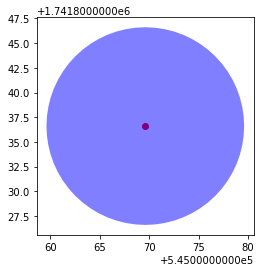

In [4]:
# buffer ข้อมูลจุด

# ตัวอย่างข้อมูล จุด
gdf_buffer_point = gdf_point.copy()
gdf_buffer_point = gdf_buffer_point.head(1)

# ตรวจสอบระบบพิกัด ด้วย xxx.crs ก่อนและ เพื่อพิจารณการใช้คำสั่ง xxx.geometry.buffer()

gdf_buffer_point['buffer'] = gdf_buffer_point.geometry.buffer(10)

gdf_buffer_point


# แสดงผล
fig, ax = plt.subplots()
gdf_buffer_point.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_buffer_point['buffer'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


<AxesSubplot:>

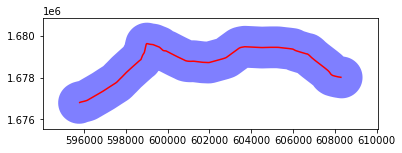

In [279]:
# buffer ข้อมูลเส้น

# ตัวอย่างข้อมูล เส้น
gdf_buffer_line = gdf_line.copy().to_crs(epsg=32647)
gdf_buffer_line = gdf_buffer_line.head(1)

# ตรวจสอบระบบพิกัด ด้วย xxx.crs ก่อนและ เพื่อพิจารณการใช้คำสั่ง xxx.geometry.buffer()

# แปลงจาก 4326 เป็น 32647 
gdf_buffer_line = gdf_buffer_line.to_crs(epsg=32647)

gdf_buffer_line['buffer'] = gdf_buffer_line.geometry.buffer(1000)

# แสดงผล
fig, ax = plt.subplots()
gdf_buffer_line.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_buffer_line['buffer'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


<AxesSubplot:>

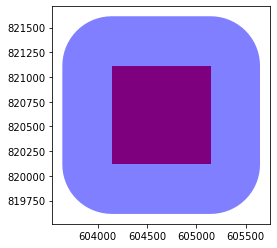

In [266]:
# buffer ข้อมูลพื้นที่

# ตัวอย่างข้อมูล พื้นที่
gdf_buffer_polygon = gdf_polygon.copy()
gdf_buffer_polygon = gdf_buffer_polygon.head(1)

# ตรวจสอบระบบพิกัด ด้วย xxx.crs ก่อนและ เพื่อพิจารณการใช้คำสั่ง xxx.geometry.buffer()

gdf_buffer_polygon['buffer'] = gdf_buffer_polygon.geometry.buffer(500)

# แสดงผล
fig, ax = plt.subplots()
gdf_buffer_polygon.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_buffer_polygon['buffer'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


##### 2.1.2 Union

<AxesSubplot:>

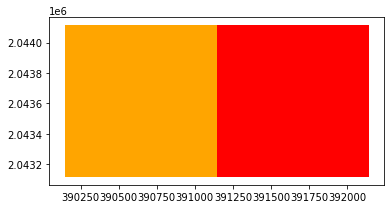

In [6]:
# ตัวอย่าง ข้อมูล

gdf_polygon_c1 = gdf_polygon.copy().to_crs(epsg=32647)
gdf_polygon_c1 = gdf_polygon_c1[gdf_polygon_c1['Id'] == 11543]

gdf_polygon_c2 = gdf_polygon.copy().to_crs(epsg=32647)
gdf_polygon_c2 = gdf_polygon_c2[gdf_polygon_c2['Id'] == 11542]

#แสดงผล
fig, ax = plt.subplots()
gdf_polygon_c1.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_polygon_c2.geometry.plot(ax=ax, color='orange')  # แสดง ผลลัพธ์

<AxesSubplot:>

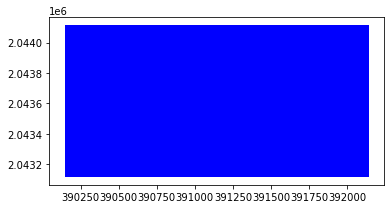

In [7]:
# ใช้ unary_union คือการนำ geometry มาทำการ union กันอย่างเดียว 

union_geometry = gdf_polygon_c1.unary_union.union(gdf_polygon_c2.unary_union)
union_gdf1 = gpd.GeoDataFrame(geometry=[union_geometry], crs=gdf_polygon_c1.crs)

#แสดงผล
fig, ax = plt.subplots()
union_gdf1.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น

C:\Users\Mizak\AppData\Local\Temp/ipykernel_7700/4000620775.py:4: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union_gdf2 = gpd.overlay(gdf_polygon_c1, gdf_polygon_c2, how='union')


<AxesSubplot:>

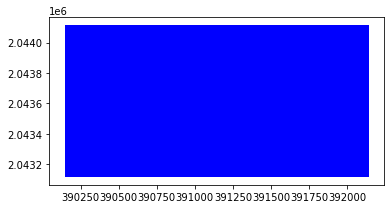

In [9]:
# Union ด้วย overlay กรณีคอลัมน์เหมือนกันฟังก์ชันจะสร้างคอลัมน์ใหม่เพื่อป้องกันชื่อคอลัมน์ที่ซ้ำกัน โดยเพิ่ม _1 และ _2 ต่อท้าย

# ใช้ overlay สำหรับ union
union_gdf2 = gpd.overlay(gdf_polygon_c1, gdf_polygon_c2, how='union')

#แสดงผล
fig, ax = plt.subplots()
union_gdf2.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น


##### 2.1.3 Centroid

<AxesSubplot:>

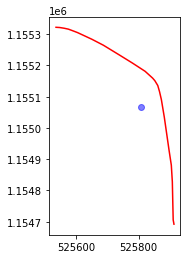

In [13]:
# centroid ข้อมูลเส้น

# ตัวอย่างข้อมูล เส้น
gdf_centroid_line = gdf_line.copy().to_crs(epsg=32647)
gdf_centroid_line = gdf_centroid_line[gdf_centroid_line['road_code'] == 'ชพ.5067']


# คำนวณ centroid (จุดศูนย์กลาง)
gdf_centroid_line['centroid'] = gdf_centroid_line.geometry.centroid

gdf_centroid_line

# แสดงผล
fig, ax = plt.subplots()
gdf_centroid_line.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_centroid_line['centroid'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง centroid


<AxesSubplot:>

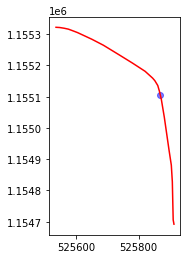

In [289]:
# centroid ข้อมูลเส้น แบบ interpolate

# ตัวอย่างข้อมูล เส้น
gdf_interpolate_line = gdf_line.copy().to_crs(epsg=32647)
gdf_interpolate_line = gdf_interpolate_line[gdf_interpolate_line['road_code'] == 'ชพ.5067']


# คำนวณ interpolate (จุดกึ่งกลางบนเส้น)
gdf_interpolate_line['interpolate'] = gdf_interpolate_line.interpolate(0.5, normalized=True)

# แสดงผล
fig, ax = plt.subplots()
gdf_interpolate_line.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_interpolate_line['interpolate'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


<AxesSubplot:>

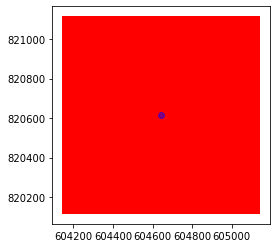

In [109]:
# centroid ข้อมูล พื้นที่

# ตัวอย่างข้อมูล เส้น
gdf_centroid_polygon = gdf_polygon.copy()
gdf_centroid_polygon = gdf_centroid_polygon.head(1)

# คำนวณ centroid (จุดศูนย์กลาง)
gdf_centroid_polygon['centroid'] = gdf_centroid_polygon.geometry.centroid

# แสดงผล
fig, ax = plt.subplots()
gdf_centroid_polygon.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_centroid_polygon['centroid'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์

##### 2.1.4 Affine Transformation

<AxesSubplot:>

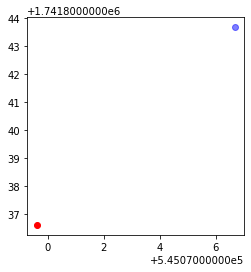

In [290]:
# Affine Transformation ในการขยับจุดตาม ทิศทาง และ ระยะทางที่กำหนด
import math

# ตัวอย่างข้อมูล จุด
gdf_move_point = gdf_point.copy()
gdf_move_point = gdf_move_point.head(1)

# ฟังก์ชันคำนวณการเลื่อนจุดตามองศาและระยะทางสำหรับทุกประเภท geometry
def move_geometry(geometry, angle_degrees, distance):
    angle_radians = math.radians(angle_degrees)
    dx = distance * math.cos(angle_radians)
    dy = distance * math.sin(angle_radians)
    
    # ตรวจสอบประเภทของ geometry
    if isinstance(geometry, Point):
        return Point(geometry.x + dx, geometry.y + dy)
    elif isinstance(geometry, LineString):
        # เลื่อนทุกจุดใน LineString
        moved_coords = [(x + dx, y + dy) for x, y in geometry.coords]
        return LineString(moved_coords)
    elif isinstance(geometry, Polygon):
        # เลื่อนทุกจุดใน Polygon (รวมถึงขอบและหลุมด้านใน)
        moved_exterior = [(x + dx, y + dy) for x, y in geometry.exterior.coords]
        moved_interiors = [
            [(x + dx, y + dy) for x, y in interior.coords] for interior in geometry.interiors
        ]
        return Polygon(moved_exterior, moved_interiors)
    else:
        raise TypeError("Geometry type not supported")

# ใช้ .apply() เพื่อใช้ฟังก์ชัน move_geometry
gdf_move_point['move'] = gdf_move_point.geometry.apply(lambda point: move_geometry(point, 45, 10))

# แสดงผล
fig, ax = plt.subplots()
gdf_move_point.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_move_point['move'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์

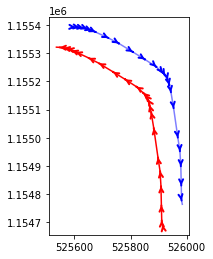

In [15]:
# Affine Transformation สลับทิศทางของเส้น
import math
from matplotlib.patches import FancyArrowPatch


# ตัวอย่างข้อมูล เส้น
gdf_reverse_line = gdf_line.copy()
gdf_reverse_line = gdf_reverse_line[gdf_reverse_line['road_code'] == 'ชพ.5067']

# แปลงจาก 4326 เป็น 32647 
gdf_reverse_line = gdf_reverse_line.to_crs(epsg=32647)

# ฟังก์ชันคำนวณการเลื่อนจุดตามองศาและระยะทางสำหรับทุกประเภท geometry
def move_geometry(geometry, angle_degrees, distance):
    angle_radians = math.radians(angle_degrees)
    dx = distance * math.cos(angle_radians)
    dy = distance * math.sin(angle_radians)
    
    # ตรวจสอบประเภทของ geometry
    if isinstance(geometry, Point):
        return Point(geometry.x + dx, geometry.y + dy)
    elif isinstance(geometry, LineString):
        # เลื่อนทุกจุดใน LineString
        moved_coords = [(x + dx, y + dy) for x, y in geometry.coords]
        return LineString(moved_coords)
    elif isinstance(geometry, Polygon):
        # เลื่อนทุกจุดใน Polygon (รวมถึงขอบและหลุมด้านใน)
        moved_exterior = [(x + dx, y + dy) for x, y in geometry.exterior.coords]
        moved_interiors = [
            [(x + dx, y + dy) for x, y in interior.coords] for interior in geometry.interiors
        ]
        return Polygon(moved_exterior, moved_interiors)
    else:
        raise TypeError("Geometry type not supported")
    

# ฟังก์ชันในการย้อนกลับ LineString
def reverse_line(line):
    if isinstance(line, LineString):
        reversed_coords = list(line.coords)[::-1]  # กลับลำดับของพิกัด
        return LineString(reversed_coords)
    return line

# ใช้ .apply() เพื่อใช้ฟังก์ชัน move_geometry
gdf_reverse_line['move_reverse'] = gdf_reverse_line.geometry.apply(lambda LineString: move_geometry(LineString, 45, 100))

gdf_reverse_line

# ใช้ ฟังก์ชัน reverse_line .apply() เข้าไปใน gdf_reverse_line['move_reverse'] เพื่อสลับ
gdf_reverse_line['move_reverse'] = gdf_reverse_line['move_reverse'].geometry.apply(reverse_line)


# ฟังก์ชันการใส่หัวลูกศร
def plot_arrowheads(line, ax, color='black'):
    coords = list(line.coords)
    for i in range(len(coords) - 1):
        x_start, y_start = coords[i]
        x_end, y_end = coords[i + 1]
        
        # คำนวณทิศทางของลูกศร
        dx = x_end - x_start
        dy = y_end - y_start
        length = (dx**2 + dy**2)**0.5
        
        # สร้างลูกศร
        arrow = FancyArrowPatch((x_end, y_end), 
                                (x_end - dx/length * 0.1, y_end - dy/length * 0.1), 
                                mutation_scale=10, color=color, lw=2, arrowstyle='->')
        ax.add_patch(arrow)


# แสดงผล
fig, ax = plt.subplots()
gdf_reverse_line.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_reverse_line['move_reverse'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์

for line in gdf_reverse_line['move_reverse']:
    plot_arrowheads(line, ax, color='blue')

for line in gdf_reverse_line['geometry']:
    plot_arrowheads(line, ax, color='red')


<AxesSubplot:>

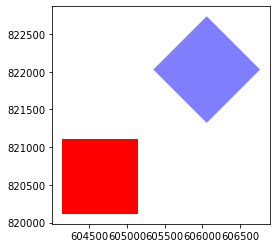

In [294]:
# Affine Transformation การหมุน Polygon
import math
from shapely.affinity import rotate

# ตัวอย่างข้อมูล พื้นที่
gdf_rotate_polygon = gdf_polygon.copy()
gdf_rotate_polygon = gdf_rotate_polygon.head(1)


# ฟังก์ชันคำนวณการเลื่อนจุดตามองศาและระยะทางสำหรับทุกประเภท geometry
def move_geometry(geometry, angle_degrees, distance):
    angle_radians = math.radians(angle_degrees)
    dx = distance * math.cos(angle_radians)
    dy = distance * math.sin(angle_radians)
    
    # ตรวจสอบประเภทของ geometry
    if isinstance(geometry, Point):
        return Point(geometry.x + dx, geometry.y + dy)
    elif isinstance(geometry, LineString):
        # เลื่อนทุกจุดใน LineString
        moved_coords = [(x + dx, y + dy) for x, y in geometry.coords]
        return LineString(moved_coords)
    elif isinstance(geometry, Polygon):
        # เลื่อนทุกจุดใน Polygon (รวมถึงขอบและหลุมด้านใน)
        moved_exterior = [(x + dx, y + dy) for x, y in geometry.exterior.coords]
        moved_interiors = [
            [(x + dx, y + dy) for x, y in interior.coords] for interior in geometry.interiors
        ]
        return Polygon(moved_exterior, moved_interiors)
    else:
        raise TypeError("Geometry type not supported")


# ใช้ .apply() เพื่อใช้ฟังก์ชัน move_geometry
gdf_rotate_polygon['move_rotate'] = gdf_rotate_polygon.geometry.apply(lambda Polygon: move_geometry(Polygon, 45, 2000))

# ใช้การหมุน (rotate) กับ geometries ที่เลื่อนแล้ว
gdf_rotate_polygon['move_rotate'] = gdf_rotate_polygon['move_rotate'].apply(lambda geom: rotate(geom, angle=45, origin='centroid'))

# แสดงผล
fig, ax = plt.subplots()
gdf_rotate_polygon.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_rotate_polygon['move_rotate'].plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


##### 2.1.5 การ Cilp

<AxesSubplot:>

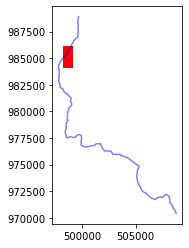

In [16]:
# ตัวอย่าง การตัด polygon ด้วย Linestring

gdf_polygon_a = gdf_polygon.copy()
gdf_polygon_a = gdf_polygon_a[gdf_polygon_a['Id'] == 46705]

gdf_line_a = gdf_line.copy().to_crs(epsg=32647)
gdf_line_a = gdf_line_a[gdf_line_a['road_code'] == 'สฎ.3033']

# แสดงผล
fig, ax = plt.subplots()
gdf_polygon_a.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_line_a.geometry.plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์


<AxesSubplot:>

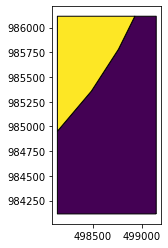

In [23]:
import numpy as np
import geopandas as gpd
from shapely.geometry import LineString, Polygon
from shapely.ops import split, unary_union
import matplotlib.pyplot as plt

def split_geometry_with_geometry(gdf_target, gdf_cut):
    """
    ตัด target geometries ด้วย cut geometries และเก็บ attributes ของ target geometries ไว้
    
    Parameters:
    gdf_target (GeoDataFrame): GeoDataFrame ที่มี geometries ที่ต้องการตัด (Polygon หรือ LineString)
    gdf_cut (GeoDataFrame): GeoDataFrame ที่มี geometries ที่ใช้ในการตัด (Polygon หรือ LineString)
    
    Returns:
    GeoDataFrame: GeoDataFrame ที่มี geometries ที่ถูกตัดพร้อม attributes
    """
    results = []

    # ใช้ลูปเพื่อทำการตัดกับแต่ละ geometry ใน gdf_target และ gdf_cut
    for idx_target, target_row in gdf_target.iterrows():
        for idx_cut, cut_row in gdf_cut.iterrows():
            if target_row.geometry.intersects(cut_row.geometry):
                
                split_geometries = None

                if isinstance(target_row.geometry, Polygon):
                    # ตัด Polygon ด้วย LineString
                    if isinstance(cut_row.geometry, LineString):
                        split_geometries = split(target_row.geometry, cut_row.geometry)
                    
                    # ตัด Polygon ด้วย Polygon
                    elif isinstance(cut_row.geometry, Polygon):
                        split_geometries = target_row.geometry.difference(cut_row.geometry)
                        if split_geometries.is_empty:
                            continue
                        elif isinstance(split_geometries, Polygon):
                            split_geometries = [split_geometries]
                        else:
                            split_geometries = [geom for geom in split_geometries]

                elif isinstance(target_row.geometry, LineString):
                    # ตัด LineString ด้วย LineString
                    if isinstance(cut_row.geometry, LineString):
                        split_geometries = split(target_row.geometry, cut_row.geometry)
                    
                    # ตัด LineString ด้วย Polygon
                    elif isinstance(cut_row.geometry, Polygon):
                        if target_row.geometry.intersects(cut_row.geometry):
                            split_geometries = target_row.geometry.intersection(cut_row.geometry)
                            if split_geometries.is_empty:
                                continue
                            if isinstance(split_geometries, LineString):
                                split_geometries = [split_geometries]
                            else:
                                split_geometries = [geom for geom in split_geometries if isinstance(geom, LineString)]

                # เก็บข้อมูลที่ได้ในรูปแบบ DataFrame
                if split_geometries is not None:
                    if isinstance(split_geometries, list):
                        for split_geom in split_geometries:
                            results.append({
                                **target_row.to_dict(),  # เก็บ attributes ของ target
                                'geometry': split_geom
                            })
                    else:
                        results.append({
                            **target_row.to_dict(),  # เก็บ attributes ของ target
                            'geometry': split_geometries
                        })

    # สร้าง GeoDataFrame จากผลลัพธ์
    gdf_split = gpd.GeoDataFrame(results, geometry='geometry', crs=gdf_target.crs)
    
    return gdf_split


# ใช้ฟังก์ชัน split_geometry_with_geometry สำหรับ ตัดแบ่ง geometry 

gdf_split_result = split_geometry_with_geometry(gdf_polygon_a, gdf_line_a)


# แยกข้อมูลออกเป็นสองคอลัมน์ใน DataFrame
gdf_split_result['geometry'] = gdf_split_result['geometry'].apply(lambda geom: [geom] if isinstance(geom, Polygon)  else geom)
gdf_split_result = gdf_split_result.explode()


# สร้าง Index
gdf_split_result.reset_index(drop=True, inplace=True)


# สร้างสีสุ่มหรือใช้ colormap
num_records = len(gdf_split_result)
colors = plt.cm.viridis(np.linspace(0, 1, num_records))  # ใช้ colormap viridis

# สร้างคอลัมน์ใหม่ใน DataFrame สำหรับสี
gdf_split_result['color'] = [colors[i] for i in range(num_records)]


# แสดงผล
fig, ax = plt.subplots()
gdf_split_result.plot(ax=ax, color=gdf_split_result['color'], edgecolor='black')  # ใช้สีจากคอลัมน์ 'color'


<AxesSubplot:>

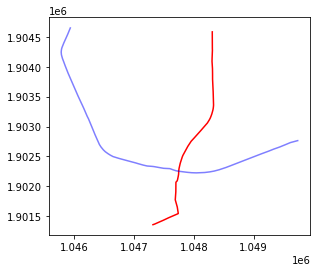

In [24]:
# ตัวอย่าง การตัด Linestring ด้วย Linestring

gdf_line_b1 = gdf_line.copy().to_crs(epsg=32647)
gdf_line_b1 = gdf_line_b1[gdf_line_b1['road_code'] == 'สน.2029']

gdf_line_b2 = gdf_line.copy().to_crs(epsg=32647)
gdf_line_b2 = gdf_line_b2[gdf_line_b2['road_code'] == 'สน.2027']

# แสดงผล
fig, ax = plt.subplots()
gdf_line_b1.geometry.plot(ax=ax, color='red')  # แสดงข้อมูลตั้งต้น
gdf_line_b2.geometry.plot(ax=ax, color='blue', alpha=0.5)  # แสดง ผลลัพธ์

<AxesSubplot:>

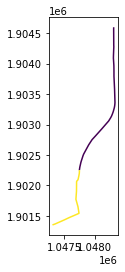

In [26]:
# ใช้ฟังก์ชัน split_geometry_with_geometry สำหรับ ตัดแบ่ง geometry 

gdf_split_result_line = split_geometry_with_geometry(gdf_line_b1, gdf_line_b2)

# แยกข้อมูลออกเป็นสองคอลัมน์ใน DataFrame
gdf_split_result_line['geometry'] = gdf_split_result_line['geometry'].apply(lambda geom: [geom] if isinstance(geom, LineString)  else geom)
gdf_split_result_line = gdf_split_result_line.explode()

# สร้าง Index
gdf_split_result_line.reset_index(drop=True, inplace=True)


# สร้างสีสุ่มหรือใช้ colormap
num_records = len(gdf_split_result_line)
colors = plt.cm.viridis(np.linspace(0, 1, num_records))  # ใช้ colormap viridis

# สร้างคอลัมน์ใหม่ใน DataFrame สำหรับสี
gdf_split_result_line['color'] = [colors[i] for i in range(num_records)]


# แสดงผล
fig, ax = plt.subplots()
gdf_split_result_line.plot(ax=ax, color=gdf_split_result['color'], edgecolor='black')  # ใช้สีจากคอลัมน์ 'color'

##### 2.2 การวิเคราะห์ความสัมพันธ์เชิงพื้นที่ (Spatial Relationships) 

การวิเคราะห์ความสัมพันธ์เชิงพื้นที่ (Spatial Relationships) คือการตรวจสอบความสัมพันธ์ทางเรขาคณิตระหว่างวัตถุเชิงพื้นที่ เช่น จุด เส้น และโพลิกอน โดยวิเคราะห์ว่ารูปร่างเหล่านั้นมีความสัมพันธ์กันในลักษณะต่างๆ อย่างไร เช่น การทับซ้อน การสัมผัส หรือการครอบคลุม เป็นต้น ประกอบด้วย คำสั่ง ดังนี้

- Intersects : ตรวจสอบว่าวัตถุเชิงพื้นที่สองชิ้นทับซ้อนกันหรือไม่ เช่น จุดหรือเส้นที่อยู่ในพื้นที่ของโพลิกอน
- Within : ตรวจสอบว่าวัตถุหนึ่งครอบคลุมวัตถุอื่นทั้งหมดหรือไม่ เช่น โพลิกอนครอบคลุมจุดหรือเส้น


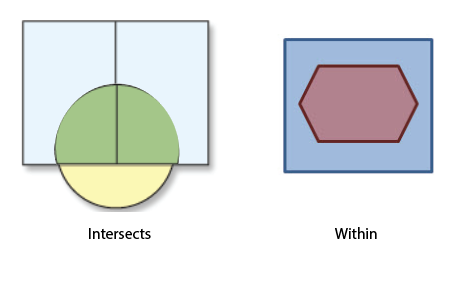

##### 2.2.1 การ Intersects

<AxesSubplot:>

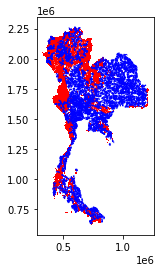

In [28]:
# ตัวอย่าง ข้อมูล

gdf_line_inter = gdf_line.copy().to_crs(epsg=32647)

gdf_polygon_inter = gdf_polygon.copy().to_crs(epsg=32647)


#แสดงผล
fig, ax = plt.subplots()
gdf_line_inter.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น
gdf_polygon_inter.geometry.plot(ax=ax, color='red')  # แสดง ผลลัพธ์

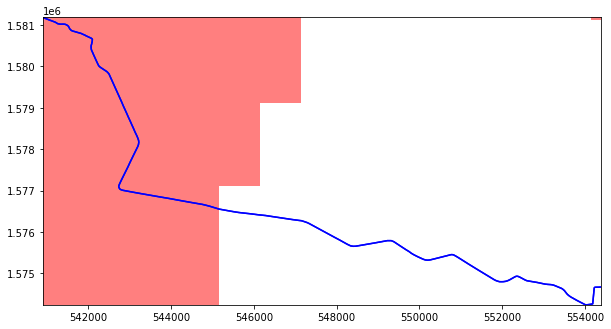

In [11]:
# ทำการ Intersection ข้อมูล ดูว่า Line ไหน ทับซ่้อน กับ Polygon บ้าง

gdf_intersection = gpd.sjoin(gdf_line_inter, gdf_polygon_inter, how='inner', op='intersects')
gdf_intersection = gdf_intersection[gdf_intersection['road_code'] == 'กจ.4051']

# กรองเฉพาะกรณีที่ line ที่ intersection กับ polygon ทั้งหมด
gdf_intersection = gdf_intersection.drop_duplicates(subset=['index_right'])


#แสดงผล
fig, ax = plt.subplots(figsize=(10, 10))
gdf_intersection.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น
gdf_polygon_inter.geometry.plot(ax=ax, color='red', alpha=0.5)  # แสดง ผลลัพธ์


# กำหนดขอบเขตการซูมเฉพาะพื้นที่ที่มีข้อมูลของ gdf_intersection
ax.set_xlim(gdf_intersection.total_bounds[[0, 2]])  # ขอบเขตตามแกน X (min, max)
ax.set_ylim(gdf_intersection.total_bounds[[1, 3]])  # ขอบเขตตามแกน Y (min, max)

plt.show()

##### 2.2.2 การ Within

<AxesSubplot:>

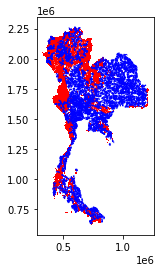

In [29]:
# ตัวอย่าง ข้อมูล

gdf_line_within = gdf_line.copy().to_crs(epsg=32647)
gdf_polygon_within = gdf_polygon.copy().to_crs(epsg=32647)


#แสดงผล
fig, ax = plt.subplots()
gdf_line_within.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น
gdf_polygon_within.geometry.plot(ax=ax, color='red')  # แสดง ผลลัพธ์


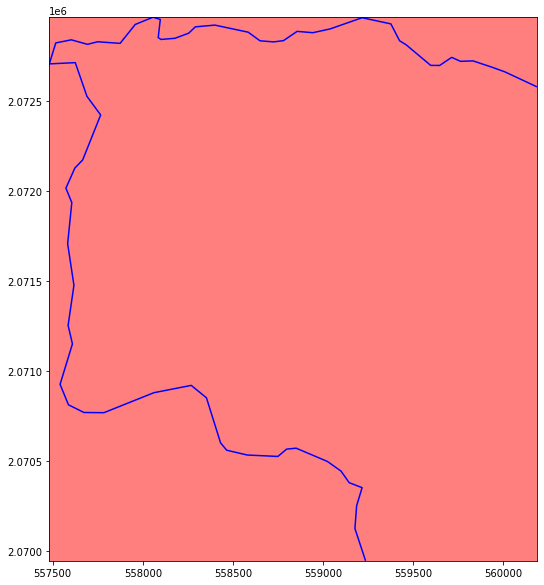

In [30]:
# ทำการ Contains ข้อมูล ดูว่า polygon ไหนคลอบคลุมทั้ง Line บ้าง
import geopandas as gpd

# สร้าง spatial index ด้วยการใช้ sjoin
gdf_within = gpd.sjoin(gdf_line_within, gdf_polygon_within, how='inner', op='within')
gdf_within = gdf_within[gdf_within['road_code'] == 'ลป.4023']

# กรองเฉพาะกรณีที่ line อยู่ภายใน polygon ทั้งหมด
gdf_within = gdf_within.drop_duplicates(subset=['index_right'])

#แสดงผล
fig, ax = plt.subplots(figsize=(10, 10))
gdf_within.geometry.plot(ax=ax, color='blue')  # แสดงข้อมูลตั้งต้น
gdf_polygon_within.geometry.plot(ax=ax, color='red', alpha=0.5)  # แสดง ผลลัพธ์


# กำหนดขอบเขตการซูมเฉพาะพื้นที่ที่มีข้อมูลของ gdf_intersection
ax.set_xlim(gdf_within.total_bounds[[0, 2]])  # ขอบเขตตามแกน X (min, max)
ax.set_ylim(gdf_within.total_bounds[[1, 3]])  # ขอบเขตตามแกน Y (min, max)

plt.show()

##### 2.3 การคำนวณเชิงพื้นที่ (Spatial Calculations)

การคำนวณเชิงพื้นที่ (Spatial Calculations) คือการวิเคราะห์ข้อมูลเชิงพื้นที่โดยคำนวณค่าต่างๆ จากรูปร่างเชิงเรขาคณิต เช่น พื้นที่ (Area) ระยะทาง (Distance) ความยาว (Length) และอื่นๆ ข้อมูลเหล่านี้มีประโยชน์อย่างมากในการศึกษาและวิเคราะห์ทางภูมิศาสตร์ เช่น การหาขอบเขตของพื้นที่ การคำนวณเส้นทาง หรือการวัดระยะทางระหว่างจุดต่างๆ ประกอบด้วย คำสั่ง ดังนี้
- การคำนวณพื้นที่ (Area Calculation) 
- การคำนวณความยาว (Length Calculation):
- การคำนวณระยะทาง (Distance Calculation): 

In [33]:
# ตัวอย่างข้อมูล 

gdf_point_cal = gdf_point.copy().to_crs(epsg=32647)
gdf_line_cal = gdf_line.copy().to_crs(epsg=32647)
gdf_polygon_cal = gdf_polygon.copy().to_crs(epsg=32647)


In [37]:
# การคำนวณพื้นที่ (Area Calculation) : ต้องการคำนวณพื้นที่ ตามกลุ่มระดับความเสี่ยง

gdf_polygon_cal['area_km2'] = gdf_polygon_cal.geometry.area / 10**6  # แปลงจาก ตร.เมตร เป็น ตร.กิโลเมตร


gdf_grouped_area = gdf_polygon_cal.groupby('Level_E')['area_km2'].sum().reset_index()

gdf_grouped_area

,Level_E,area_km2
0,High,40256.0
1,Low,102371.0
2,Medium,95384.0
3,Very High,11557.0
4,Very Low,7495.0


In [46]:
# การคำนวณความยาว (Length Calculation): ต้องการคำนวณ ถนนที่มีความยาว มากที่สุด และ น้อยที่สุด

gdf_line_cal['length_m'] = gdf_line_cal.geometry.length

gdf_line_cal

# หาความยาวที่มากที่สุดและน้อยที่สุด
max_length_row = gdf_line_cal.loc[gdf_line_cal['length_m'].idxmax()]
min_length_row = gdf_line_cal.loc[gdf_line_cal['length_m'].idxmin()]



# แสดงผลลัพธ์ ความยาวที่มากที่สุด และน้อยที่สุด พร้อมคอลัมน์ road_code โดยปัดเศษทศนิยม 3 ตำแหน่ง
print("ความยาวที่มากที่สุด:")

print(f"Road Code: {max_length_row['road_code']}, ความยาว: {round(max_length_row['length_m'] / 1000, 3)} กิโลเมตร")

print("\nความยาวที่น้อยที่สุด:")
print(f"Road Code: {min_length_row['road_code']}, ความยาว: {round(min_length_row['length_m'] / 1000, 3)} กิโลเมตร")


ความยาวที่มากที่สุด:
Road Code: อบ.3150, ความยาว: 87.137 กิโลเมตร

ความยาวที่น้อยที่สุด:
Road Code: ปน.6075, ความยาว: 0.207 กิโลเมตร
